In [1]:
import easyshapey
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import seaborn as sns
%matplotlib inline

In [2]:
x = np.array([201, 201, 287, 166,  58, 157, 146, 218, 203, 186, 160,  47, 210,
       131, 202, 125, 158, 198, 165, 244])
y = np.array([592, 442, 402, 400, 173, 317, 344, 533, 495, 423, 337, 583, 479,
       311, 504, 334, 416, 510, 393, 401])
sigma_y = np.array([61, 25, 15, 34, 15, 52, 22, 16, 21, 42, 31, 38, 27, 16, 14, 26, 16,
       30, 14, 25])

mu=np.nanmean(y)
sigma=np.nanstd(y)
sigma_y_gaussian= np.random.normal(mu, sigma, len(y))

data=pd.DataFrame([x, y, np.zeros(len(x)), sigma_y ]).transpose()

In [3]:
data.values[:,0]

array([201., 201., 287., 166.,  58., 157., 146., 218., 203., 186., 160.,
        47., 210., 131., 202., 125., 158., 198., 165., 244.])

#### Now create a box around that data by fitting a line to the data 

In [4]:
b=easyshapey.Box()
b.data=data

In [5]:
print ('vertices: {} '.format(np.round(b.vertices, 1)))
print ('length : {}'.format(len(b)))
print ('angle : {}'.format(b.angle))
print ('completeness: {}'.format(b.efficiency))
print ('scatter: {}'.format(b.scatter))
print ('coefficients: {}'.format(b.coeffs))

vertices: [[ 23.  316.2]
 [311.  546.3]
 [311.  458.4]
 [ 23.  228.3]
 [ 23.  316.2]] 
length : 20
angle : 0.6740973666606466
completeness: 0.35
scatter: 43.972097781752645
coefficients: [  0.79894508 253.87276922]


In [6]:
b.angle*57.2958

38.622947900715076

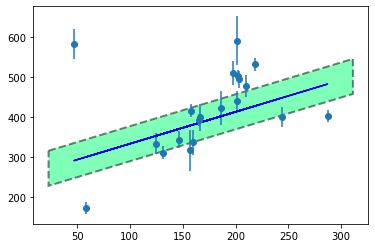

In [7]:
fig, ax=plt.subplots()
b.alpha=0.5
b.color="#01FF70"
ax.errorbar(x, y, sigma_y, fmt = "o")
b.plot(ax=ax, only_shape=True, size=4)
line=np.poly1d(b.coeffs)
plt.plot(b.data[0], line(b.data[0]), 'b')

#### try a larger box 

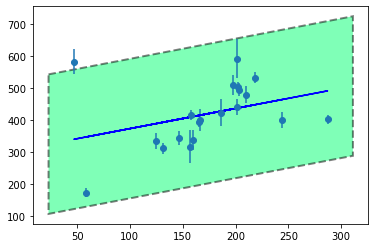

In [8]:

b=easyshapey.Box(sigma=3)
b.data=data
fig, ax=plt.subplots()
b.alpha=0.5
b.color="#01FF70"
ax.errorbar(x, y, sigma_y, fmt = "o")
b.plot(ax=ax, only_shape=True, size=4)
line=np.poly1d(b.coeffs)
plt.plot(b.data[0], line(b.data[0]), 'b')

#### try a box with custom vertices

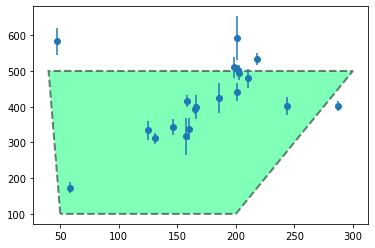

In [9]:

v1= (50, 100)
v2=( 40, 500)
v3=(300,500)
v4=(200,100)

custom_vertices=[v1, v2, v3, v4, v1]
#you can only do 4-vertice polygons though
b=easyshapey.Box()
b.vertices=custom_vertices
fig, ax=plt.subplots()
b.alpha=0.5
b.color="#01FF70"
ax.errorbar(x, y, sigma_y, fmt = "o")
b.plot(ax=ax, only_shape=True, size=4)
line=np.poly1d(b.coeffs)

#### what if I the data had gaussian errorbars

In [10]:
bx=easyshapey.Box()
bx.data=pd.DataFrame([x, y, np.zeros(len(x)), sigma_y_gaussian ]).transpose()

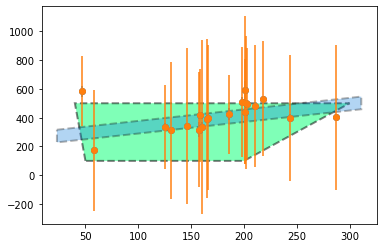

In [11]:
fig, ax=plt.subplots()
bx.color="#0074D9"
ax.errorbar(x, y, sigma_y, fmt = "o")
ax.errorbar(x, y, sigma_y_gaussian, fmt = "o")
b.plot(ax=ax, only_shape=True, size=4)
bx.plot(ax=ax, only_shape=True, size=4)

#### Selection

(14, 2) (2, 14)


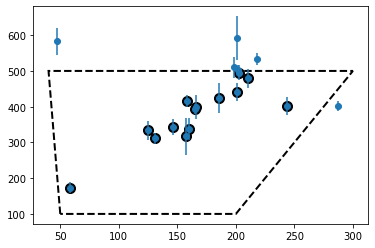

In [12]:
#with a pandas array
s1=b.select(data[[0, 1]])
d=pd.DataFrame(data[[0, 1]]).transpose()
#witth a nympy arrat
s2=b.select(data[[0, 1]].values.T)
print (s1.shape, s2.shape)
fig, ax=plt.subplots()
b.color='none'
b.edgecolor='k'
b.alpha=1.
b.plot(ax=ax)
ax.errorbar(x, y, sigma_y, fmt = "o")
ax.scatter(s2[0], s2[1], c='k', s=100)
#large things are select

### Checking points in the box

In [13]:
b.contains([(150, 400), (0.5, 1)])

[True, False]

### Rotations

In [19]:
import copy
b2=copy.deepcopy(b)
b2.rotate(np.pi/3)
b2.color='none'
b2.edgecolor="#B10DC9"
b3=copy.deepcopy(b)
b3.edgecolor='#39CCCC'
b3.color='none'
b3.rotate(np.pi/3-b.angle)

angles 1.5458015331759765 0.49860398197937883
reminder : axes scales are not the same


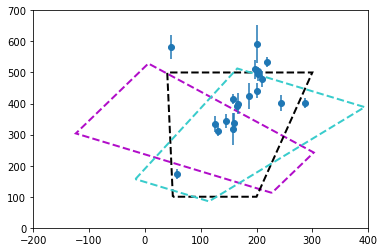

In [27]:
fig, ax=plt.subplots()
ax.set_xlim(-200, 400.0)
ax.set_ylim(0, 700.0)
b2.plot()
b.plot(only_shape=True)
b3.plot(highlight=False) 
ax.errorbar(x, y, sigma_y, fmt = "o")
print ('angles {} {}'.format(b.angle, b2.angle))
print ('reminder : axes scales are not the same')